In [1]:
from __future__ import division
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
#from kde import weighted_gaussian_kde
from scipy import stats
from astropy.cosmology import FlatLambdaCDM,Planck15
import sys
from time import gmtime, strftime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [1]:
import clustering
import clustering.projected_correlation_functions as w
import clustering.randoms as rand
from clustering.utils import wp_d1d2,wp_dd

ModuleNotFoundError: No module named 'clustering'

Read in Cosmology

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

## Looking at Peebles Function Results

In [4]:
## Read in LRGs ACF, LRGboot (pimax=60, estimator='P', errtype='b', m=100) Created 7/30/2017
##     bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
rp_LRGPboot=np.load('output/rp_LRGboot.npy')
wp_p_LRGPboot=np.load('output/wp_p_LRGboot.npy')
wp_p_err_LRGPboot=np.load('output/wp_p_err_LRGboot.npy')
cov_LRGPboot=np.load('output/cov_LRGboot.npy')
wp_arr_LRGPboot=np.load('output/wp_arr_LRGboot.npy')

## Read in CCF b/w Peas & LRGs, xc_Pboot, (pimax=60, m=100, estimator='P',errtype='b') Created 8/172017
rp_xcPboot=np.load('output/rp_xc_Pboot.npy')
wp_p_xcPboot=np.load('output/wp_xc_Pboot.npy')
wp_p_err_xcPboot=np.load('output/wp_xc_err_Pboot.npy')
cov_xcPboot=np.load('output/cov_xc_Pboot.npy')
wp_arr_xc_Pboot=np.load('output/wp_arr_xc_Pboot.npy')


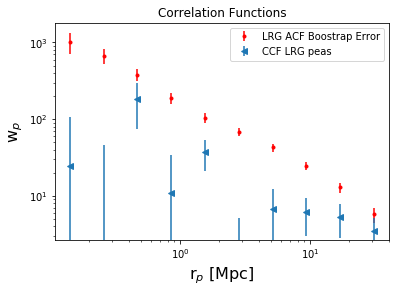

In [5]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')

#plt.errorbar(rp_peaACF_P,wp_p_peaACF_P,yerr=wp_p_err_peaACF_P,fmt='o',label='Peas ACF')
plt.errorbar(rp_LRGPboot,wp_p_LRGPboot,yerr=wp_p_err_LRGPboot,fmt='.',color='r',label='LRG ACF Boostrap Error')
plt.errorbar(rp_xcPboot,wp_p_xcPboot,wp_p_err_xcPboot,fmt='<',label='CCF LRG peas')
#plt.errorbar(rp_xcPboot,wp_p_ACFxc,wp_p_err_ACFxc,fmt='o',color='g',label='$W_{PP}=W_{PL}^2/W_{LL}$')

plt.legend(frameon=True,loc=1,numpoints=1)
plt.xlabel('r$_{p}$ [Mpc]',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Correlation Functions')
#plt.plot(rpdm[:-1],wdm0[:-1],label='$w_{P,DM}$ Bolshoi $z=0$')
#plt.plot(rpdm[:-1],wdm5[:-1],color='m',label='$w_{P,DM}$ Bolshoi $z=.5$')

plt.savefig('../plots/wp_ACFfromCCF.pdf')

## Trying Union of All Peas in CCF (DR7+DR12+DR14 no SF limitation...)

In [6]:
## note created April 2018, pimax=60, bins = np.array([1,4,8,16,32,40,50,60,100])
## thought would take 4 days to run??? but ran in 40 min...
#rp_xcPboot,wp_p_xcPboot,wp_p_err_xcPboot,cov_xcPboot,wp_arr_xcPboot = w.cross_wp(d1=peas,d2=LRG, 
#r1=rzpea, r2=LRGr, bins=bins,pimax=pimax,m=100, estimator='P',errtype='b')
allrp_xcPboot=np.load('output/shortrp_xcPboot_all.npy')
allwp_p_xcPboot=np.load('output/shortwp_p_xcPboot_all.npy')
allwp_p_err_xcPboot=np.load('output/shortwp_p_err_xcPboot_all.npy')
allcov_xcPboot=np.load('output/shortcov_xcPboot_all.npy')
allwp_arr_xc_Pboot=np.load('output/shortwp_arr_xcPboot_all.npy')

In [13]:
wp_p_xcPboot

array([  24.31090074,  -32.79721936,  185.16250854,   10.92344733,
         37.23832596,   -2.43094534,    6.76082995,    6.19771165,
          5.31216109,    3.5333475 ])

In [10]:
## Created the ACF of the Peas via the CCF with the LRGs
wp_p_ACFxc=(wp_p_xcPboot*wp_p_xcPboot)/wp_p_LRGPboot
wp_p_err_ACFxc= wp_p_ACFxc*np.sqrt(2*(wp_p_err_xcPboot/wp_p_xcPboot)**2 + (wp_p_err_LRGPboot/wp_p_LRGPboot)**2)

allwp_p_ACFxc=(allwp_p_xcPboot*allwp_p_xcPboot)/wp_p_LRGPboot
allwp_p_err_ACFxc= allwp_p_ACFxc*np.sqrt(2*(allwp_p_err_xcPboot/allwp_p_xcPboot)**2 + (wp_p_err_LRGPboot/wp_p_LRGPboot)**2)


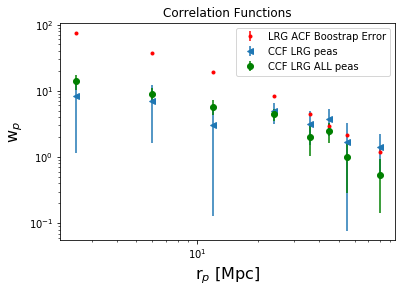

In [15]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')

#plt.errorbar(rp_peaACF_P,wp_p_peaACF_P,yerr=wp_p_err_peaACF_P,fmt='o',label='Peas ACF')
plt.errorbar(rp_LRGPboot,wp_p_LRGPboot,yerr=wp_p_err_LRGPboot,fmt='.',color='r',label='LRG ACF Boostrap Error')
plt.errorbar(rp_xcPboot,wp_p_xcPboot,wp_p_err_xcPboot,fmt='<',label='CCF LRG peas')
plt.errorbar(allrp_xcPboot,allwp_p_xcPboot,allwp_p_err_xcPboot,fmt='o',color='g',label='CCF LRG ALL peas')
plt.errorbar(rp_xcPboot,wp_p_ACFxc,wp_p_err_ACFxc,fmt='o',color='g',label='$W_{PP}=W_{PL}^2/W_{LL}$')

plt.legend(frameon=True,loc=1,numpoints=1)
plt.xlabel('r$_{p}$ [Mpc]',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Correlation Functions')
#plt.plot(rpdm[:-1],wdm0[:-1],label='$w_{P,DM}$ Bolshoi $z=0$')
#plt.plot(rpdm[:-1],wdm5[:-1],color='m',label='$w_{P,DM}$ Bolshoi $z=.5$')

plt.savefig('../plots/wp_ACFfromCCF.pdf')

In [6]:
## Read in CCF b/w Peas & LRGs, xc_Pboot, (pimax=60, m=100, estimator='P',errtype='b') Created Oct 2017
##    bins = np.array([1,4,8,16,32,40,50,60,100])
rp_LRGPboot=np.load('output/rp_LRGrgt1.npy')
wp_p_LRGPboot=np.load('output/wp_p_LRGrgt1.npy')
wp_p_err_LRGPboot=np.load('output/wp_p_err_LRGrgt1.npy')
cov_LRGPboot=np.load('output/cov_LRGrgt1.npy')
wp_arr_LRGPboot=np.load('output/wp_arr_LRGrgt1.npy')


rp_xcPboot=np.load('output/rp_xcPbootrgt1bg.npy')
wp_p_xcPboot=np.load('output/wp_p_xcPbootrgt1bg.npy')
wp_p_err_xcPboot=np.load('output/wp_p_err_xcPbootrgt1bg.npy')
cov_xcPboot=np.load('output/cov_xcPbootrgt1bg.npy')
wp_arr_xc_Pboot=np.load('output/wp_arr_xcPbootrgt1bg.npy')

In [7]:
print(rp_xcPboot)
print(rp_LRGPboot)

[  2.5   6.   12.   24.   36.   45.   55.   80. ]
[  2.5   6.   12.   24.   36.   45.   55.   80. ]


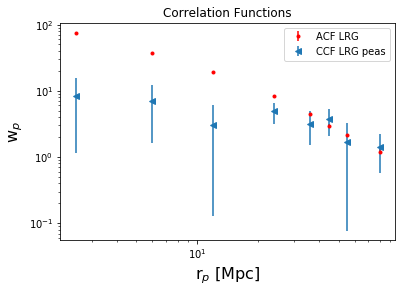

In [8]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')

#plt.errorbar(rp_peaACF_P,wp_p_peaACF_P,yerr=wp_p_err_peaACF_P,fmt='o',label='Peas ACF')
plt.errorbar(rp_LRGPboot,wp_p_LRGPboot,yerr=wp_p_err_LRGPboot,fmt='.',color='r',label='ACF LRG')
plt.errorbar(rp_xcPboot,wp_p_xcPboot,wp_p_err_xcPboot,fmt='<',label='CCF LRG peas')
#plt.errorbar(rp_xcPboot,wp_p_ACFxc,wp_p_err_ACFxc,fmt='o',color='g',label='$W_{PP}=W_{PL}^2/W_{LL}$')

plt.legend(frameon=True,loc=1,numpoints=1)
plt.xlabel('r$_{p}$ [Mpc]',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Correlation Functions')
#plt.plot(rpdm[:-1],wdm0[:-1],label='$w_{P,DM}$ Bolshoi $z=0$')
#plt.plot(rpdm[:-1],wdm5[:-1],color='m',label='$w_{P,DM}$ Bolshoi $z=.5$')

plt.savefig('../plots/wp_ACFfromCCF.pdf')

In [18]:
## Created the ACF of the Peas via the CCF with the LRGs
wp_p_ACFxc=(wp_p_xcPboot*wp_p_xcPboot)/wp_p_LRGPboot
wp_p_err_ACFxc= wp_p_ACFxc*np.sqrt(2*(wp_p_err_xcPboot/wp_p_xcPboot)**2 + (wp_p_err_LRGPboot/wp_p_LRGPboot)**2)
## division/mult errors propegated by dq/q=sqrt((da/a)^2+etc.)


In [8]:
print(cov_xc_Pboot)

[[  6.83177314e+03  -6.20980600e+02   8.15047136e+02  -3.70496352e+02
    4.83574756e+01   1.65527532e+01   2.17502659e+01  -1.95058996e+01
   -8.09098211e+00  -2.20121741e+01]
 [ -6.20980600e+02   6.27489333e+03  -4.91292918e+02   9.45761226e+01
    4.77793431e+01  -7.37265260e+01   2.13483986e+01  -8.68366398e+00
    2.35027846e+00   2.07457973e+00]
 [  8.15047136e+02  -4.91292918e+02   1.22440394e+04   1.59158154e+02
   -6.47282281e+01   6.13646957e+01   9.77921667e+01   7.02287008e+01
    4.11893573e+01  -1.52440388e+01]
 [ -3.70496352e+02   9.45761226e+01   1.59158154e+02   5.56750765e+02
    9.77360933e+01   1.74965999e+01   5.43446447e+00   2.52206852e+01
    1.66828056e+01   5.66312876e+00]
 [  4.83574756e+01   4.77793431e+01  -6.47282281e+01   9.77360933e+01
    2.55231100e+02   3.65343442e+01   1.46102832e+01   7.51204387e+00
    8.23519446e+00   3.70031338e-01]
 [  1.65527532e+01  -7.37265260e+01   6.13646957e+01   1.74965999e+01
    3.65343442e+01   5.80465781e+01   1.53878

In [11]:
print(wp_p_LRGPboot)
print(wp_p_xcPboot)
print(wp_p_ACFxc)
print(rp_LRGPboot)
print(rp_xcPboot[4:20])

[ 1021.75044755   674.61514331   379.25453248   189.04117831   105.14235834
    68.5413169     42.75752957    24.61101803    12.91682928     5.7215873 ]
[  24.31090074  -32.79721936  185.16250854   10.92344733   37.23832596
   -2.43094534    6.76082995    6.19771165    5.31216109    3.5333475 ]
[  5.78438597e-01   1.59447591e+00   9.04014366e+01   6.31194233e-01
   1.31887181e+01   8.62179999e-02   1.06902391e+00   1.56074932e+00
   2.18467356e+00   2.18200718e+00]
[  0.14102821   0.25675091   0.46743152   0.85098909   1.54928027
   2.8205642    5.13501822   9.34863035  17.01978177  30.98560543]
[  1.54928027   2.8205642    5.13501822   9.34863035  17.01978177
  30.98560543]


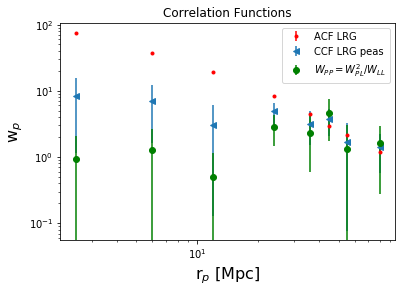

In [21]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')

#plt.errorbar(rp_peaACF_P,wp_p_peaACF_P,yerr=wp_p_err_peaACF_P,fmt='o',label='Peas ACF')
plt.errorbar(rp_LRGPboot,wp_p_LRGPboot,yerr=wp_p_err_LRGPboot,fmt='.',color='r',label='ACF LRG')
plt.errorbar(rp_xcPboot,wp_p_xcPboot,wp_p_err_xcPboot,fmt='<',label='CCF LRG peas')
plt.errorbar(rp_xcPboot,wp_p_ACFxc,wp_p_err_ACFxc,fmt='o',color='g',label='$W_{PP}=W_{PL}^2/W_{LL}$')

plt.legend(frameon=True,loc=1,numpoints=1)
plt.xlabel('r$_{p}$ [Mpc]',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Correlation Functions')
#plt.plot(rpdm[:-1],wdm0[:-1],label='$w_{P,DM}$ Bolshoi $z=0$')
#plt.plot(rpdm[:-1],wdm5[:-1],color='m',label='$w_{P,DM}$ Bolshoi $z=.5$')

plt.savefig('../plots/wp_ACFfromCCF.pdf')

## Fitting Peebles Results with a Gamma function (powerlaw fit to bias)

In [22]:
## Load scipy gamma function & Curvefit
from scipy.special import gamma
from scipy.optimize import curve_fit
## Gamma is a function from cosmology package (gamma is slope and r0 is amplitude)
##https://www.hindawi.com/journals/aa/2012/853701/

In [23]:
import scipy
print(scipy.version.version)

0.19.1


In [24]:
# define the function 'A' to represent the gamma function
def A(g):
    return gamma(1/2)*gamma((g-1)/2)/gamma(g/2) 
#y is model powerlaw given rp & 2 parameters of fit
def y(r,r0,g):
    return A(g)*(r0**g)*(r**(1.-g))

In [16]:
y(1,1,2)

3.1415926535897927

In [30]:
## Now fit an actual gamma curve to the data rp2 & wp two halo data (so r_p > 1 Mpc)
#   y is model powerlaw given rp & 2 parameters of fit
#   p0 is guess

## Fit to LRGs
plawfit=curve_fit(y,rp_LRGPboot ,wp_p_LRGPboot,sigma=cov_LRGPboot ,p0=[2,2])
r0LRG=plawfit[0][0]
gamLRG=plawfit[0][1]
# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gamLRG)*2*g)
sig_dataLRG = np.sqrt(J(gamLRG)*(r0LRG/8)**gamLRG)
sig_dm = (0.8)
biasLRG = sig_dataLRG/sig_dm

yf_arr_LRG=[]
for r in rp_LRGPboot:
    yf_arr_LRG.append(y(r,r0LRG,gamLRG))


In [33]:
## Testing errors used in curve fitting
plawfit=curve_fit(y,rp_LRGPboot,wp_p_LRGPboot,sigma=wp_p_err_LRGPboot,p0=[2,2])
r0LRGsig=plawfit[0][0]
gamLRGsig=plawfit[0][1]
plawfit=curve_fit(y,rp_LRGPboot,wp_p_LRGPboot,p0=[2,2])
r0LRG=plawfit[0][0]
gamLRG=plawfit[0][1]
#print(cov_LRGPboot.shape)
#len(wp_p_err_LRGPboot)

In [39]:
plawfit=curve_fit(y,rp_LRGPboot,wp_p_LRGPboot,sigma=cov_LRGPboot,p0=[2,2])
r0LRGcov=plawfit[0][0]
gamLRGcov=plawfit[0][1]

In [40]:
## Gamma of slope depending on errors used, use covariance matrix
print(gamLRG,gamLRGsig,gamLRGcov)
### NOTE erros matter, use covariance matrix for calcuations...

1.92050731778 2.03692189504 1.97894424376


In [41]:
print(r0LRG,gamLRG)
print(J(gamLRG))
print(sig_dataLRG)
print(biasLRG)
print(yf_arr_LRG)

7.97960775835 1.92050731778
1.85679725411
1.47690912493
1.84613640616
[79.246266215619229, 33.633588205578995, 17.064030595349319, 8.6574509499024508, 5.8211195048632849, 4.678827306250823, 3.8443405535902198, 2.6639183031605267]


In [43]:
## Now fit to xc function
plawfit=curve_fit(y,rp_xcPboot ,wp_p_xcPboot, sigma=cov_xcPboot ,p0=[2,2])
r0xc=plawfit[0][0]
gamxc=plawfit[0][1]
# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gamxc)*2*g)
sig_dataxc = np.sqrt(J(gamxc)*(r0xc/8)**gamxc)
sig_dm = (0.8)
biasxc = sig_dataxc/sig_dm

yf_arr_xc=[]
for r in rp_xcPboot:
    yf_arr_xc.append(y(r,r0xc,gamxc))


In [ ]:
print(r0xc,gamxc)
print(J(gamxc))
print(sig_dataxc)
print(biasxc)
print(yf_arr_xc)

In [73]:
##Fit to Peas CF Derived via CCF
plawfit=curve_fit(y,rp_xcPboot ,wp_p_ACFxc,sigma=wp_p_err_ACFxc, p0=[2,2])
r0ACFxc=plawfit[0][0]
gamACFxc=plawfit[0][1]
# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gamACFxc)*2*g)
sig_dataACFxc = np.sqrt(J(gamACFxc)*(r0ACFxc/8)**gamACFxc)
sig_dm = (0.8)
biasACFxc = sig_dataACFxc/sig_dm

yf_arr_ACFxc=[]
for r in rp_xcPboot:
    yf_arr_ACFxc.append(y(r,r0ACFxc,gamACFxc))

/Users/ccardamone/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


In [74]:
print(r0ACFxc,gamACFxc)
print(J(gamACFxc))
print(sig_dataACFxc)
print(biasACFxc)
print(yf_arr_ACFxc)

1.19388056368e-06 1.00000123426
1.20000004937
0.000423176816223
0.000528971020279
[1.9345290785690556, 1.9345269881957294, 1.9345253331566483, 1.9345236781189834, 1.9345227099846682, 1.9345221771821135, 1.9345216980383939, 1.9345208033788674]


In [52]:
print(gamLRG,gamxc,gamACFxc)

1.92050731778 1.50277154165 1.00000102994


In [53]:
print(wp_p_LRGPboot[4:6])
print(wp_p_xcPboot[4:6])
print(wp_p_ACFxc[4:6])
print(rp_xcPboot)

[ 4.38837826  2.98380608]
[ 3.20680141  3.70418454]
[ 2.34336575  4.59848352]
[  2.5   6.   12.   24.   36.   45.   55.   80. ]


In [41]:
print(r0xc,gamxc)
print(J(gamxc))
print(sig_dataxc)
print(biasxc)
print(yf_arr_xc)

0.348588891152 1.11185155249
1.21466260104
0.193079928349
0.241349910436
[7.4176136361649796, 6.936809426170929, 6.4871705881802013, 6.0666770059127888, 5.6734395055264732, 5.3056913680252045, 4.9617803918268653, 4.6401614698295068, 4.3393896476266356, 4.0581136316838347]


In [75]:
plawfit=curve_fit(y,rp_xcPboot ,wp_p_ACFxc, p0=[2,2])
r0ACFxc=plawfit[0][0]
gamACFxc=plawfit[0][1]
# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gamACFxc)*2*g)
sig_dataACFxc = np.sqrt(J(gamACFxc)*(r0ACFxc/8)**gamACFxc)
sig_dm = (0.8)
biasACFxc = sig_dataACFxc/sig_dm

yf_arr_ACFxc=[]
for r in rp_xcPboot:
    yf_arr_ACFxc.append(y(r,r0ACFxc,gamACFxc))

/Users/ccardamone/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


In [76]:
print(r0ACFxc,gamACFxc)
print(J(gamACFxc))
print(sig_dataACFxc)
print(biasACFxc)
print(yf_arr_ACFxc)

1.19388056368e-06 1.00000123426
1.20000004937
0.000423176816223
0.000528971020279
[1.9345290785690556, 1.9345269881957294, 1.9345253331566483, 1.9345236781189834, 1.9345227099846682, 1.9345221771821135, 1.9345216980383939, 1.9345208033788674]


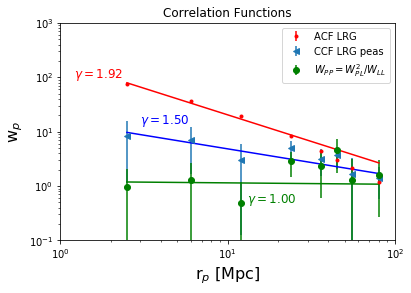

In [70]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.axis([1,100,.1,1000])

#plt.errorbar(rp_peaACF_P,wp_p_peaACF_P,yerr=wp_p_err_peaACF_P,fmt='o',label='Peas ACF')
plt.errorbar(rp_LRGPboot,wp_p_LRGPboot,yerr=wp_p_err_LRGPboot,fmt='.',color='r',label='ACF LRG')
plt.errorbar(rp_xcPboot,wp_p_xcPboot,wp_p_err_xcPboot,fmt='<',label='CCF LRG peas')
plt.errorbar(rp_xcPboot,wp_p_ACFxc,wp_p_err_ACFxc,fmt='o',color='g',label='$W_{PP}=W_{PL}^2/W_{LL}$')

plt.legend(frameon=True,loc=1,numpoints=1)
plt.xlabel('r$_{p}$ [Mpc]',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Correlation Functions')
#plt.plot(rpdm[:-1],wdm0[:-1],label='$w_{P,DM}$ Bolshoi $z=0$')
#plt.plot(rpdm[:-1],wdm5[:-1],color='m',label='$w_{P,DM}$ Bolshoi $z=.5$')

plt.plot(rp_xcPboot,np.array(yf_arr_xc)**2/np.array(yf_arr_LRG),color='g')
plt.plot(rp_LRGPboot,yf_arr_LRG,color='r')
plt.plot(rp_xcPboot,yf_arr_xc,color='b')
plt.text(1.2,100,'$\gamma=$'+"{0:.2f}".format(gamLRG),color='r',fontsize=12)
plt.text(3,14,'$\gamma=$'+"{0:.2f}".format(gamxc),color='b',fontsize=12)
plt.text(13,.5,'$\gamma=$'+"{0:.2f}".format(gamACFxc),color='g',fontsize=12)

#plt.plot(rpdm[:-1],wdm0[:-1],label='$w_{P,DM}$ Bolshoi $z=0$')
#plt.plot(rpdm[:-1],wdm5[:-1],color='m',label='$w_{P,DM}$ Bolshoi $z=.5$')

#plt.savefig('../plots/wp_ACFfromCCF.pdf')

In [ ]:
## Fitting with the covarance matrix, and eventually in comparison to bias from DM instead of a PL 
# DM clustering depends on the volume of the simulation, we want to use a similar volume, as it's best...

## Merry fit with halo tools parameterized tool (Signal not good so useless)
## use correlated chisquared not chisquared....


Rather than chi squared - take reduced
data wp
model - Power law or model WP

PL fit now with gamma function
    (y-wp)^2 / sig^2




# Testing the pimax value used (60)

In [50]:
rp_xc_pi20=np.load('output/rp_xc_pi20.npy')
wp_xc_pi20=np.load('output/wp_xc_pi20.npy')
wp_xc_err_pi20=np.load('output/wp_xc_err_pi20.npy')
rp_xc_pi40=np.load('output/rp_xc_pi40.npy')
wp_xc_pi40=np.load('output/wp_xc_pi40.npy')
wp_xc_err_pi40=np.load('output/wp_xc_err_pi40.npy')
rp_xc_pi60=np.load('output/rp_xc_pi60.npy')
wp_xc_pi60=np.load('output/wp_xc_pi60.npy')
wp_xc_err_pi60=np.load('output/wp_xc_err_pi60.npy')
rp_xc_pi80=np.load('output/rp_xc_pi80.npy')
wp_xc_pi80=np.load('output/wp_xc_pi80.npy')
wp_xc_err_pi80=np.load('output/wp_xc_err_pi80.npy')
rp_xc_pi100=np.load('output/rp_xc_pi100.npy')
wp_xc_pi100=np.load('output/wp_xc_pi100.npy')
wp_xc_err_pi100=np.load('output/wp_xc_err_pi100.npy')
rp_xc_pi120=np.load('output/rp_xc_pi120.npy')
wp_xc_pi120=np.load('output/wp_xc_pi120.npy')
wp_xc_err_pi120=np.load('output/wp_xc_err_pi120.npy')
rp_xc_pi140=np.load('output/rp_xc_pi140.npy')
wp_xc_pi140=np.load('output/wp_xc_pi140.npy')
wp_xc_err_pi140=np.load('output/wp_xc_err_pi140.npy')
rp_xc_pi50=np.load('output/rp_xc_pi50.npy')
wp_xc_pi50=np.load('output/wp_xc_pi50.npy')
wp_xc_err_pi50=np.load('output/wp_xc_err_pi50.npy')
rp_xc_pi70=np.load('output/rp_xc_pi70.npy')
wp_xc_pi70=np.load('output/wp_xc_pi70.npy')
wp_xc_err_pi70=np.load('output/wp_xc_err_pi70.npy')

In [51]:
y10=np.array([wp_xc_pi20[3],wp_xc_pi40[3],wp_xc_pi50[3],wp_xc_pi60[3],wp_xc_pi70[3],wp_xc_pi80[3],wp_xc_pi100[3],wp_xc_pi120[3],wp_xc_pi140[3]])
y10err=np.array([wp_xc_err_pi20[3],wp_xc_err_pi40[3],wp_xc_err_pi50[3],wp_xc_err_pi60[3],wp_xc_err_pi70[3],wp_xc_err_pi80[3],wp_xc_err_pi100[3],wp_xc_err_pi120[3],wp_xc_err_pi140[3]])
x=np.array([20,40,50,60,70,80,100,120,140])
y25=np.array([wp_xc_pi20[6],wp_xc_pi40[6],wp_xc_pi50[6],wp_xc_pi60[6],wp_xc_pi70[6],wp_xc_pi80[6],wp_xc_pi100[6],wp_xc_pi120[6],wp_xc_pi140[6]])
y25err=np.array([wp_xc_err_pi20[6],wp_xc_err_pi40[6],wp_xc_err_pi50[6],wp_xc_err_pi60[6],wp_xc_err_pi70[6],wp_xc_err_pi80[6],wp_xc_err_pi100[6],wp_xc_err_pi120[6],wp_xc_err_pi140[6]])


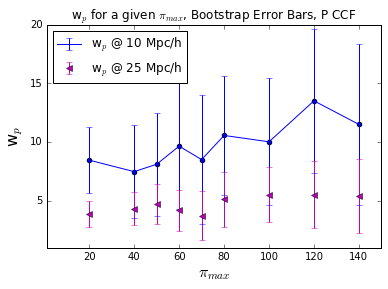

In [52]:
plt.axis([1,150,1,20])
plt.scatter(x,y10)
plt.errorbar(x,y10,y10err,color='b',label='w$_{p}$ @ 10 Mpc/h')
plt.errorbar(x,y25,y25err,color='m',fmt='<',label='w$_{p}$ @ 25 Mpc/h')
plt.legend(frameon=True,numpoints=1,loc=2)
plt.xlabel('$\pi_{max}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('w$_{p}$ for a given $\pi_{max}$, Bootstrap Error Bars, P CCF')

plt.savefig('../plots/pimax_wp_10Mpc_25Mpc.pdf')


Read in Peas/LRG Autocorrelation data for futher analysis

In [4]:
## ACF LRGs
rp_LRGboot=np.load('output/rp_LRGboot.npy')
wp_p_LRGboot=np.load('output/wp_p_LRGboot.npy')
wp_p_err_LRGboot=np.load('output/wp_p_err_LRGboot.npy')
cov_LRGboot=np.load('output/cov_LRGboot.npy')
wp_arr_LRGboot=np.load('output/wp_arr_LRGboot.npy')

rp_LRGjack=np.load('output/rp_LRGjack.npy')
wp_p_LRGjack=np.load('output/wp_p_LRGjack.npy')
wp_p_err_LRGjack=np.load('output/wp_p_err_LRGjack.npy')
cov_LRGjack=np.load('output/cov_LRGjack.npy')
wp_arr_LRGjack=np.load('output/wp_arr_LRGjack.npy')
 # With new bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
#np.save('output/rp_LRGauto_pi60.npy',rp)
#np.save('output/wp_LRGauto_pi60.npy',wp_p)
#np.save('output/wp_LRGauto_err_pi60.npy',wp_p_err)

## ACF Peas (peebles)
rp_boot=np.load('output/rp_boot.npy')
wp_p_boot=np.load('output/wp_p_boot.npy')
wp_p_err_boot=np.load('output/wp_p_err_boot.npy')
cov_boot=np.load('output/cov_boot.npy')
wp_arr_boot=np.load('output/wp_arr_boot.npy')

#rp_jack=np.load('output/rp_jack.npy')
#wp_p_jack=np.load('output/wp_p_jack.npy')
#wp_p_err_jack=np.load('output/wp_p_err_jack.npy')
#cov_jack=np.load('output/cov_jack.npy')
#wp_arr_jack=np.load('output/wp_arr_jack.npy')

 # With new bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
rp_PeasACF_pi60=np.load('output/rp_PeasACF_pi60.npy')
wp_PeasACF_pi60=np.load('output/wp_PeasACF_pi60.npy')
wp_PeasACF_err_pi60=np.load('output/wp_PeasACF_err_pi60.npy')

##Peebles & Bootstrap and bins=bins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])
rp_peaACF_P=np.load('output/rp_PpeaACF.npy')
wp_p_peaACF_P=np.load('output/wp_p_PpeaACF.npy')
wp_p_err_peaACF_P=np.load('output/wp_p_err_PpeaACF.npy')
cov_peaACF_P=np.load('output/cov_PpeaACF.npy')
wp_arr_peaACF_P=np.load('output/wp_arr_PpeaACF.npy')
## Landy Szalay and boostrap and bins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])
rp_peaACF_L=np.load('output/rp_LpeaACF.npy')
wp_peaACF_L=np.load('output/wp_p_LpeaACF.npy')
wp_err_peaACF_L=np.load('output/wp_p_err_LpeaACF.npy')
cov_peaACF_L=np.load('output/cov_LpeaACF.npy')
wp_arr_peaACF_L=np.load('output/wp_arr_LpeaACF.npy')


In [5]:
.33*(cosmo.comoving_volume(.36) - cosmo.comoving_volume(.11))

<Quantity 3749970473.3941417 Mpc3>

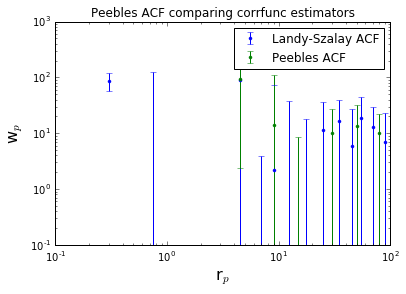

In [55]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
#plt.errorbar(rp_boot,wp_p_boot,yerr=wp_p_err_boot,fmt='.',color='g',label='ACF Boostrap Error')
#plt.errorbar(rp_jack,wp_p_jack,yerr=wp_p_err_jack,fmt='.',color='c',label='ACF Jackknife')
plt.errorbar(rp_peaACF_L,wp_peaACF_L,yerr=wp_err_peaACF_L,fmt='.',color='b',label='Landy-Szalay ACF')
plt.errorbar(rp_peaACF_P,wp_p_peaACF_P,yerr=wp_p_err_peaACF_P,fmt='.',color='g',label='Peebles ACF')
#plt.errorbar(rp_LRGjack,wp_p_LRGjack,yerr=wp_p_err_LRGjack,fmt='.',color='m',label='LRG ACF Jackknife')
#plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.axis([.1,100,.1,1000])
plt.legend(frameon=True,numpoints=1,loc=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Peebles ACF comparing corrfunc estimators')
plt.savefig('../plots/ACF_LSvsPeebles.pdf')

Read in cross-correlation for analysis

In [56]:
rp_xc_Pboot=np.load('output/rp_xc_Pboot.npy')
wp_xc_Pboot=np.load('output/wp_xc_Pboot.npy')
wp_xc_err_Pboot=np.load('output/wp_xc_err_Pboot.npy')
cov_xc_Pboot=np.load('output/cov_xc_Pboot.npy')
wp_arr_xc_Pboot=np.load('output/wp_arr_xc_Pboot.npy')

rp_xc_Pjack=np.load('output/rp_xc_Pjack.npy')
wp_xc_Pjack=np.load('output/wp_xc_Pjack.npy')
wp_xc_err_Pjack=np.load('output/wp_xc_err_Pjack.npy')
cov_xc_Pjack=np.load('output/cov_xc_Pjack.npy')
wp_arr_xc_Pjack=np.load('output/wp_arr_xc_Pjack.npy')



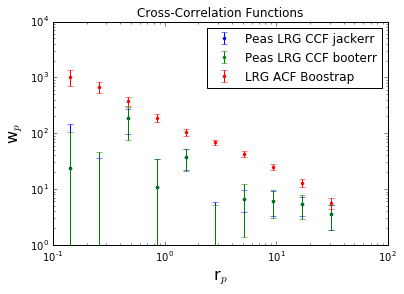

In [57]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_xc_Pjack,wp_xc_Pjack,yerr=wp_xc_err_Pjack,fmt='.',color='b',label='Peas LRG CCF jackerr')
plt.errorbar(rp_xc_Pboot,wp_xc_Pboot,yerr=wp_xc_err_Pboot,fmt='.',color='g',label='Peas LRG CCF booterr')
plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions')

plt.savefig('../plots/wp_peasLRG_PeeblesACF.pdf')

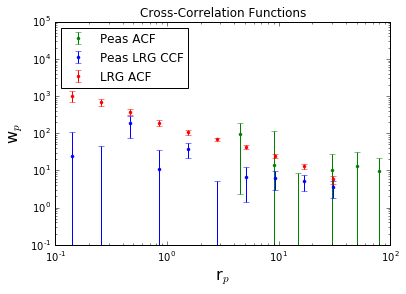

In [58]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_peaACF_P,wp_p_peaACF_P,yerr=wp_p_err_peaACF_P,fmt='.',color='g',label='Peas ACF')
plt.errorbar(rp_xc_Pboot,wp_xc_Pboot,yerr=wp_xc_err_Pboot,fmt='.',color='b',label='Peas LRG CCF')
plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF')
plt.legend(frameon=True,numpoints=1,loc=2)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions')
plt.axis([.1,100,.1,100000])


plt.savefig('../plots/wp_peasLRG_PeeblesACF.pdf')

Fit with a powerlaw to determine the bias

In [59]:
from scipy.special import gamma
from scipy.optimize import curve_fit


In [60]:
#Fit with a powerlaw to determine bias (using the autocorrelation of the LRGs)
# Gamma is a function from cosmology package (gamma is slope and r0 is amplitude)
##https://www.hindawi.com/journals/aa/2012/853701/
def A(g):
    return gamma(1/2)*gamma((g-1)/2)/gamma(g/2) 
#y is model powerlaw given rp & 2 parameters of fit
def y(r,r0,g):
    return A(g)*(r0**g)*(r**(1.-g))

In [61]:
y(1,1,2)

3.1415926535897927

In [62]:
rp_LRGboot[3:20]  ### try fitting only beyond 1 MPC/h

array([  0.85098909,   1.54928027,   2.8205642 ,   5.13501822,
         9.34863035,  17.01978177,  30.98560543])

In [63]:
## Now fit an actual curve to the data rp2 & wp two halo data
#sigerr=wp_p_err
##p0 is guesses
#y is model powerlaw given rp & 2 parameters of fit

plawfitLRG=curve_fit(y,rp_LRGboot[3:20],wp_p_LRGboot[3:20],p0=[2,2])
r0LRG=plawfitLRG[0][0]
gamLRG=plawfitLRG[0][1]

# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gamLRG)*2*g)
sig_dataLRG = np.sqrt(J(gamLRG)*(r0LRG/8)**gamLRG)
sig_dm = (0.8)
biasLRG = sig_dataLRG/sig_dm

In [64]:
print('gamma(ACF LRG)=', gamLRG)
print('r0(ACF LRG)=', r0LRG)
print('sigma(ACF LRG)=', sig_dataLRG)
print('bias(ACF LRG)=', biasLRG)

gamma(ACF LRG)= 1.868581119
r0(ACF LRG)= 7.83874206082
sigma(ACF LRG)= 1.36438531944
bias(ACF LRG)= 1.7054816493


In [65]:
print(rp_peaACF_P,wp_p_peaACF_P,wp_p_err_peaACF_P)


[  0.3    0.75   2.     4.5    7.     9.    15.    30.    50.    80.  ] [ -40.         -106.         -120.           95.75168504  -87.67444999
   13.92267152  -12.81534078   10.17189795   13.27435017    9.91272396] [ 18.90326251  52.19079218   0.          93.37725748  48.81426978
  99.03173263  21.3855393   16.74424441  19.0138914   12.1855491 ]


In [66]:
## Now fit an actual curve to the data rp2 & wp two halo data
#sigerr=wp_p_err
##p0 is guesses
#y is model powerlaw given rp & 2 parameters of fit
plawfitPeas=curve_fit(y,rp_peaACF_P,wp_p_peaACF_P,p0=[2,2])
r0Peas=plawfitLRG[0][0]
gamPeas=plawfitLRG[0][1]

# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gamPeas)*2*g)
sig_dataPeas =np.sqrt(J(gamPeas)*(r0Peas/8)**gamPeas)
sig_dm = (0.8)
biasPeas = sig_dataPeas/sig_dm

/Users/ccardamone/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


In [67]:
print('gamma(ACF Peas)=', gamPeas)
print('r0(ACF Peas)=', r0Peas)
print('sigma(ACF Peas)=', sig_dataPeas)
print('bias(ACF Peas)=', biasPeas)

gamma(ACF Peas)= 1.868581119
r0(ACF Peas)= 7.83874206082
sigma(ACF Peas)= 1.36438531944
bias(ACF Peas)= 1.7054816493


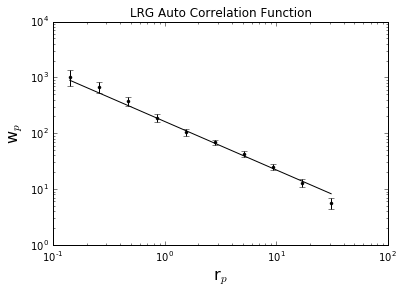

In [68]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
yf_arr_LRG=[]
for r in rp_LRGboot:
    yf_arr_LRG.append(y(r,r0LRG,gamLRG))
plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='k')
plt.plot(rp_LRGboot,yf_arr_LRG,color='k')
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('LRG Auto Correlation Function')


In [69]:
## Read in DM wp's calculated w/ halotools catalogs (bolshoi)
wdm0=np.load('output/bolshoi_0_wp_dm.npy')
wdm5=np.load('output/bolshoi_0.5_wp_dm.npy')
rpbins=np.load('output/bolshoi_rp_used.npy')
rpdm=(rpbins[:1] + rpbins[1:])/2.

In [70]:
wdm5

array([  2.26535261e+01,   1.32231087e+01,   9.45076010e+00,
         7.64670246e+00,   5.38409843e+00,   3.44793785e+00,
         1.94842531e+00,   7.12685336e-01,   3.00832973e-01,
        -1.74625325e-02])

In [71]:
rp_xc_Pboot
wp_xc_Pboot

array([  24.31090074,  -32.79721936,  185.16250854,   10.92344733,
         37.23832596,   -2.43094534,    6.76082995,    6.19771165,
          5.31216109,    3.5333475 ])

In [72]:
## Now fit an actual curve to the data rp2 & wp two halo data
#sigerr=wp_p_err
##p0 is guesses
#y is model powerlaw given rp & 2 parameters of fit

plawfit=curve_fit(y,rp_xc_Pboot[3:20] ,wp_xc_Pboot[3:20] ,p0=[2,2])
r0xc=plawfit[0][0]
gamxc=plawfit[0][1]

# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gamxc)*2*g)
sig_dataxc = np.sqrt(J(gamxc)*(r0xc/8)**gamxc)
sig_dm = (0.8)
biasxc = sig_dataxc/sig_dm

In [73]:
print('gamma(CCF LRG peas)=', gamxc)
print('r0(CCF LRG peas)=', r0xc)
print('sigma(CCF LRG peas)=', sig_dataxc)
print('bias(CCF LRG peas)=', biasxc)
### Bias is the sqrt (bias LRG * bias peas)

gamma(CCF LRG peas)= 1.47288185995
r0(CCF LRG peas)= 2.25438288182
sigma(CCF LRG peas)= 0.465391975512
bias(CCF LRG peas)= 0.58173996939


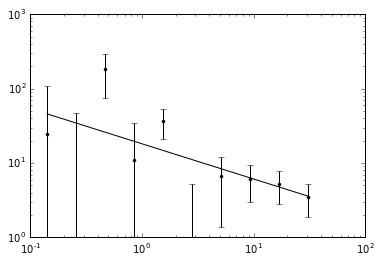

In [74]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
yf_arr_xc=[]
for r in rp_xc_Pboot:
    yf_arr_xc.append(y(r,r0xc,gamxc))
plt.errorbar(rp_xc_Pboot,wp_xc_Pboot,yerr=wp_xc_err_Pboot,fmt='.',color='k')
plt.plot(rp_xc_Pboot,yf_arr_xc,color='k')

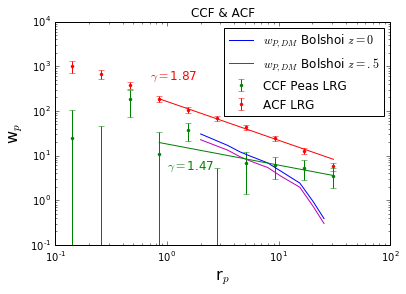

In [75]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
#plt.errorbar(rp_xc_Pjack,wp_xc_Pjack,yerr=wp_xc_err_Pjack,fmt='.',color='b',label='Peas LRG CCF jackerr')
plt.errorbar(rp_xc_Pboot,wp_xc_Pboot,yerr=wp_xc_err_Pboot,fmt='.',color='g',label='CCF Peas LRG')
plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='ACF LRG')
plt.plot(rpdm[:-1],wdm0[:-1],label='$w_{P,DM}$ Bolshoi $z=0$')
plt.plot(rpdm[:-1],wdm5[:-1],color='m',label='$w_{P,DM}$ Bolshoi $z=.5$')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('CCF & ACF')
plt.plot(rp_xc_Pboot[3:20],yf_arr_xc[3:20],color='g')
plt.plot(rp_LRGboot[3:20],yf_arr_LRG[3:20],color='r')
plt.text(.7,500,'$\gamma=$'+"{0:.2f}".format(gamLRG),color='r',fontsize=12)
plt.text(1,5,'$\gamma=$'+"{0:.2f}".format(gamxc),color='g',fontsize=12)

plt.savefig('../plots/wp_CCF_DM.pdf')

In [72]:
print(biasxc,biasLRG)


0.65956887137 1.84977225952


In [73]:
print(wp_p_LRGboot)
print(wp_xc_Pboot)


[ 1021.75044755   674.61514331   379.25453248   189.04117831   105.14235834
    68.5413169     42.75752957    24.61101803    12.91682928     5.7215873 ]
[  24.31090074  -32.79721936  185.16250854   10.92344733   37.23832596
   -2.43094534    6.76082995    6.19771165    5.31216109    3.5333475 ]


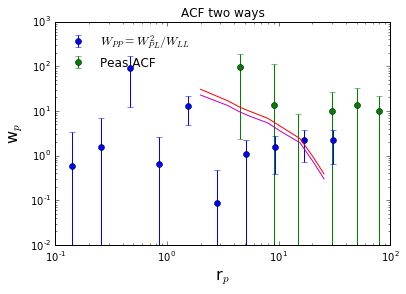

In [78]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
y1=(wp_xc_Pboot*wp_xc_Pboot)/wp_p_LRGboot
yerr1 = y1*np.sqrt(2*(wp_xc_err_Pboot/wp_xc_Pboot)**2 + (wp_p_err_LRGboot/wp_p_LRGboot)**2)
## division/mult errors propegated by dq/q=sqrt((da/a)^2+etc.)
plt.errorbar(rp_xc_Pboot,y1,yerr1,fmt='o',label='$W_{PP}=W_{PL}^2/W_{LL}$')
plt.errorbar(rp_peaACF_P,wp_p_peaACF_P,yerr=wp_p_err_peaACF_P,fmt='o',label='Peas ACF')
plt.legend(frameon=False,loc=2,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('ACF two ways')
plt.plot(rpdm[:-1],wdm0[:-1],label='$w_{P,DM}$ Bolshoi $z=0$')
plt.plot(rpdm[:-1],wdm5[:-1],color='m',label='$w_{P,DM}$ Bolshoi $z=.5$')

plt.savefig('../plots/wp_ACFfromCCF.pdf')

In [126]:
### r_p returned from CCF/ACF functions is mid-bin.
#Used in ACF of peas: bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
### output rpboot is then - [  2.    4.5   7.    9.   12.5  17.5  25.   35.   45.   55. ]
#Used in wp_DM: rpbins = np.array([1,3,6,8,10,15,20,30,40,50,60])
print(rp_boot)
print(rpdm)
print(rp_boot[np.array([0,1,2])])
#matchrp=np.arr
rp_PeasACF_pi60,

[  2.    4.5   7.    9.   12.5  17.5  25.   35.   45.   55. ]
[  2.    3.5   4.5   5.5   8.   10.5  15.5  20.5  25.5  30.5]
[ 2.   4.5  7. ]


(array([  2. ,   4.5,   7. ,   9. ,  12.5,  17.5,  25. ,  35. ,  45. ,  55. ]),)

In [125]:
print(wp_PeasACF_pi60)
print(wdm0)
print(wp_PeasACF_pi60/wdm0)
B_ACF=wp_PeasACF_pi60/wdm0
rp_PeasACF_pi60,

[ -114.          2382.19348295   166.31201435   925.50128441   759.07017527
   496.01001092   602.91628285   468.48430535   399.37044794   399.71856368]
[ 30.51441626  16.87175972  12.12543956   9.8556689    6.83392563
   4.45280993   2.41952342   0.91446521   0.38812959  -0.03417333]
[ -3.73593907e+00   1.41194133e+02   1.37159576e+01   9.39054765e+01
   1.11073813e+02   1.11392586e+02   2.49188033e+02   5.12304130e+02
   1.02896160e+03  -1.16967983e+04]


(array([  2. ,   4.5,   7. ,   9. ,  12.5,  17.5,  25. ,  35. ,  45. ,  55. ]),)

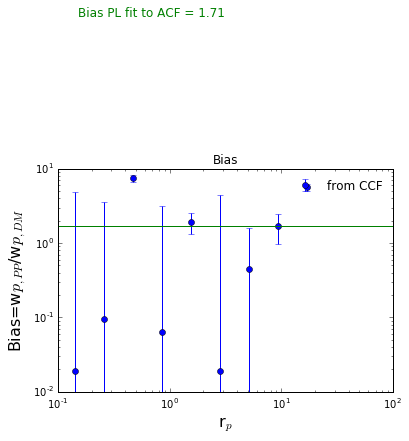

In [83]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
B_ACF=np.array(wp_p_peaACF_P/wdm0)
B_ACFerr=B_ACF*np.sqrt((wp_p_err_peaACF_P/wp_p_peaACF_P)**2)

B_CCF=np.array(y1/wdm0)
B_CCFerr=np.sqrt((yerr1/y1)**2)

#B_LRGACF=np.array(wp_p_LRG/wdm0)

#plt.errorbar(rp_peaACF_P,B_ACF,B_ACFerr,fmt='o', label='from Peas ACF',color='g')
plt.errorbar(rp_xc_Pboot,B_CCF,B_CCFerr,fmt='o', label='from CCF',color='b')

#plt.legend(frameon=False)
#plt.axhline(y=biasxc,color='b')
#plt.axhline(y=biasPeas,color='g')

plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('Bias=w$p_{,PP}$/w$p_{,DM}$',fontsize=16)
plt.title('Bias')
#Bias = wpp/wdm
plt.text(.15,1100,'Bias PL fit to ACF = '+"{0:.2f}".format(biasPeas),color='g',fontsize=12)
plt.legend(frameon=False,loc=1,numpoints=1)


In [105]:
print(biasxc/biasLRG)


0.790063415881


In [ ]:
### need w_DM @ peas median z, like .2ish
w_DM=1
w_LL=wp_p_LRGboot
w_PL=wp_xc_Pboot
w_PP=w_PL**2/w_LL
bias = np.sqrt(w_PP/w_DM)


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [90]:
def func(x, b):
#    return (a * x) + b
    return b

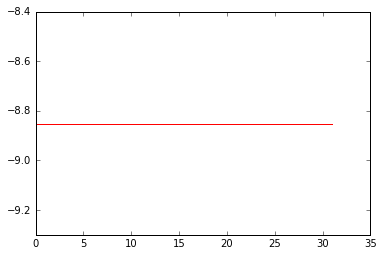

In [95]:
popt, pcov = curve_fit(func, rp_xc_Pboot, B_CCF, sigma=B_CCFerr)
plt.plot( rp_xc_Pboot, np.ones(len(rp_xc_Pboot))*popt, 'r-', label='fit')


In [92]:
popt

array([-8.8515584])